In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
import requests
import mysql.connector
import config
from bs4 import BeautifulSoup 
import json
from functools import reduce


pd.set_option('display.max_columns', 310)


# Data import/Manipulation from CSV file

In [62]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", usecols=['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales','Critic_Score', 'User_Score','User_Count','Developer','Rating'])
# 
# dropping all null values
data.dropna(inplace = True)
data.info()
# data_le_nums


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 180 to 16141
Data columns (total 15 columns):
Name               6644 non-null object
Platform           6644 non-null object
Year_of_Release    6644 non-null float64
Genre              6644 non-null object
Publisher          6644 non-null object
NA_Sales           6644 non-null float64
EU_Sales           6644 non-null float64
JP_Sales           6644 non-null float64
Other_Sales        6644 non-null float64
Global_Sales       6644 non-null float64
Critic_Score       6644 non-null float64
User_Score         6644 non-null object
User_Count         6644 non-null float64
Developer          6644 non-null object
Rating             6644 non-null object
dtypes: float64(8), object(7)
memory usage: 830.5+ KB


In [63]:
# copy dataframe to new DF, and converting FLOAT's to INT's
data_le = data.copy()
# makes Year_of_Release into INT it was a FLOAT
data_le['Year_of_Release']=data_le['Year_of_Release'].astype(int)
data_le['Critic_Score']=data_le['Critic_Score'].astype(int)
data_le['User_Count']=data_le['User_Count'].astype(float)
data_le['User_Score']=data_le['User_Score'].astype(float) * 10
data_le['NA_Sales']=1000000 * data_le['NA_Sales'].astype(float)
data_le['EU_Sales']=data_le['EU_Sales'].astype(float) * 1000000
data_le['JP_Sales']=data_le['JP_Sales'].astype(float) * 1000000
data_le['Other_Sales']=data_le['Other_Sales'].astype(float) * 1000000
data_le['Global_Sales']=data_le['Global_Sales'].astype(float) * 1000000

data_le_nums = data_le.drop(columns=['Name','Platform','Genre','Publisher', 'Developer', 'Rating'])

data_le

Name Platform  \
180                               Monster Hunter Stories      3DS   
181                          The Elder Scrolls V: Skyrim      PS4   
182                              Rise of the Tomb Raider      PS4   
183                                     MLB 16: The Show      PS4   
184                                          Doom (2016)     XOne   
185                          The Elder Scrolls V: Skyrim     XOne   
186                                            Minecraft     WiiU   
189          Mario & Sonic at the Rio 2016 Olympic Games      3DS   
190                                      Hyrule Warriors      3DS   
192                                F1 2016 (Codemasters)      PS4   
193                                   Resident Evil Zero      PS4   
195          Mario & Sonic at the Rio 2016 Olympic Games     WiiU   
198    Dragon Quest Heroes II: Twin Kings and the Pro...      PS4   
199                               Attack on Titan (KOEI)      PS4   
204                                          Doom (2016)       PC   
205                                  Valkyria Chronicles      PS4   
420                             The Witcher 3: Wild Hunt       PC   
421                                        Steins;Gate 0      PSV   
422                             The Witcher 3: Wild Hunt      PS4   
423                             The Witcher 3: Wild Hunt     XOne   
424                The Legend of Zelda: Majora's Mask 3D      3DS   
425                                     Cities: Skylines       PC   
426                               Xenoblade Chronicles X     WiiU   
427                         Brothers: A Tale of Two Sons     XOne   
428                                        Grand Kingdom      PSV   
429                        Pokemon Super Mystery Dungeon      3DS   
434                                    Super Mario Maker     WiiU   
435                                          Stella Glow      3DS   
436                                           Bloodborne      PS4   
437                         Brothers: A Tale of Two Sons      PS4   
...                                                  ...      ...   
14663                                      Strikers 1945       PS   
14665                                 Grand Theft Auto 2       PS   
14666                              Gundam Battle Assault       PS   
14667                                  Silhouette Mirage       PS   
14668                                   Vanguard Bandits       PS   
14669                Clock Tower II: The Struggle Within       PS   
15019                 Castlevania: Symphony of the Night       PS   
15020                                  Final Fantasy VII       PS   
15021                                          Half-Life       PC   
15022                                            Alundra       PS   
15023                            Oddworld: Abe's Oddysee       PS   
15025                          Tenchu: Stealth Assassins       PS   
15026                                       Gran Turismo       PS   
15029                              Final Fantasy Tactics       PS   
15030                                       Ace Combat 2       PS   
15031                                          RPG Maker       PS   
15033                                      Bushido Blade       PS   
15034                                        Colony Wars       PS   
15035                                           RayStorm       PS   
15307                                      Resident Evil       PS   
15308                                           Tekken 2       PS   
15309                                             Diablo       PC   
15311                                        Tomb Raider       PS   
15312                                        Tomb Raider       PC   
15313                                 PaRappa The Rapper       PS   
15314                      Super Puzzle Fighter II Turbo       PS   
15789                             Battle Arena Tos

In [5]:
data_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 180 to 16141
Data columns (total 15 columns):
Name               6644 non-null object
Platform           6644 non-null object
Year_of_Release    6644 non-null int64
Genre              6644 non-null object
Publisher          6644 non-null object
NA_Sales           6644 non-null float64
EU_Sales           6644 non-null float64
JP_Sales           6644 non-null float64
Other_Sales        6644 non-null float64
Global_Sales       6644 non-null float64
Critic_Score       6644 non-null int64
User_Score         6644 non-null float64
User_Count         6644 non-null float64
Developer          6644 non-null object
Rating             6644 non-null object
dtypes: float64(7), int64(2), object(6)
memory usage: 830.5+ KB


### Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [87]:
# Created dummies for rating column

data_le_platform_dummy = data_le['Platform'].str.get_dummies(sep=',')
data_le_genre_dummy = data_le['Genre'].str.get_dummies(sep=',')
data_le_rating_dummy = data_le['Rating'].str.get_dummies(sep=',')
# data_le_publisher_dummy = data_le['Publisher'].str.get_dummies(sep=',')


#merging all dummy dataframes to main dataframe

dataframes=[data_le,data_le_rating_dummy, data_le_platform_dummy,data_le_genre_dummy]

data_le_dummy =  reduce(lambda left,right: pd.merge(left, right, how='outer', left_index=True, right_index=True),  dataframes)
data_le_dummy = data_le_dummy.fillna(0)

In [89]:
# data_le_dummy = data_le_dummy.reset_index()
data_le_dummy.reset_index()

index                                               Name Platform_x  \
0       180                             Monster Hunter Stories        3DS   
1       181                        The Elder Scrolls V: Skyrim        PS4   
2       182                            Rise of the Tomb Raider        PS4   
3       183                                   MLB 16: The Show        PS4   
4       184                                        Doom (2016)       XOne   
5       185                        The Elder Scrolls V: Skyrim       XOne   
6       186                                          Minecraft       WiiU   
7       189        Mario & Sonic at the Rio 2016 Olympic Games        3DS   
8       190                                    Hyrule Warriors        3DS   
9       192                              F1 2016 (Codemasters)        PS4   
10      193                                 Resident Evil Zero        PS4   
11      195        Mario & Sonic at the Rio 2016 Olympic Games       WiiU   
12      198  Dragon Quest Heroes II: Twin Kings and the Pro...        PS4   
13      199                             Attack on Titan (KOEI)        PS4   
14      204                                        Doom (2016)         PC   
15      205                                Valkyria Chronicles        PS4   
16      420                           The Witcher 3: Wild Hunt         PC   
17      421                                      Steins;Gate 0        PSV   
18      422                           The Witcher 3: Wild Hunt        PS4   
19      423                           The Witcher 3: Wild Hunt       XOne   
20      424              The Legend of Zelda: Majora's Mask 3D        3DS   
21      425                                   Cities: Skylines         PC   
22      426                             Xenoblade Chronicles X       WiiU   
23      427                       Brothers: A Tale of Two Sons       XOne   
24      428                                      Grand Kingdom        PSV   
25      429                      Pokemon Super Mystery Dungeon        3DS   
26      434                                  Super Mario Maker       WiiU   
27      435                                        Stella Glow        3DS   
28      436                                         Bloodborne        PS4   
29      437                       Brothers: A Tale of Two Sons        PS4   
...     ...                                                ...        ...   
6614  14663                                      Strikers 1945         PS   
6615  14665                                 Grand Theft Auto 2         PS   
6616  14666                              Gundam Battle Assault         PS   
6617  14667                                  Silhouette Mirage         PS   
6618  14668                                   Vanguard Bandits         PS   
6619  14669                Clock Tower II: The Struggle Within         PS   
6620  15019                 Castlevania: Symphony of the Night         PS   
6621  15020                                  Final Fantasy VII         PS   
6622  15021                                          Half-Life         PC   
6623  15022                                            Alundra         PS   
6624  15023                            Oddworld: Abe's Oddysee         PS   
6625  15025                          Tenchu: Stealth Assassins         PS   
6626  15026                                       Gran Turismo         PS   
6627  15029                              Final Fantasy Tactics         PS   
6628  15030                                       Ace Combat 2         PS   
6629  15031                                          RPG Maker         PS   
6630  15033                                      Bushido Blade         PS   
6631  15034                                        Colony Wars         PS   
6632  15035                                           RayStorm         PS   
6633  15307                                      Resident Evil         PS   
66

In [83]:
# dropping columns for extra dummy variable and orginal column

# data_le_with_dummies.drop(columns='index_x')
data_le_dummy = data_le_dummy.drop(columns=['Platform_x','Genre','Publisher','Developer','Rating','AO','GBA', 'Platform_y','Misc','Unknown'])




KeyError: "['Platform_x' 'Genre' 'Publisher' 'Developer' 'Rating' 'AO' 'GBA'\n 'Platform_y' 'Misc' 'Unknown'] not found in axis"

In [84]:
data_le.describe(include = 'O').transpose()


count unique                          top  freq
Name       6644   4278  Need for Speed: Most Wanted     8
Platform   6644     17                          PS2  1141
Genre      6644     12                       Action  1574
Publisher  6644    251              Electronic Arts   923
Developer  6644   1259                    EA Canada   149
Rating     6644      7                            T  2321

# Api Calls for the Console info

In [58]:
api_key = config.api_key

headers = {
    'x-rapidapi-host': "rawg-video-games-database.p.rapidapi.com",
    'x-rapidapi-key': f"{api_key}"
    }
console_data = []
for i in range(1,100):    ### Consoles in api call some are empty and i know there isn't more then 100 consoles
    url = f"https://rawg-video-games-database.p.rapidapi.com/platforms/{i}"
    response = requests.request("GET", url, headers=headers)
    if response == '{"detail":"Not found."}':
        break
    else:
        console_data.append(response.json())

console_data

[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [704]:
#making copy of api info
console_data_copy = console_data.copy()
console_data_copy

[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [59]:
# removing empty "{"detail":"Not found."}" from api call list of dictionaries
console_data_copy = [x for x in console_data_copy if keys is not 'detail' in x]

console_data_copy

NameError: name 'keys' is not defined

In [678]:
# for i in range(0,len(console_data_copy)):
#     if console_data_copy[i] == {'detail': 'Not found.'}:
#         console_data_copy.remove(console_data_copy[i])
#         continue
#     else:
#         break
# console_data_copy



[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [672]:
# for i in range(0,len(console_data_copy)):
#     data_consoles = pd.DataFrame.from_dict(console_data_copy[i])

# data_consoles

ValueError: If using all scalar values, you must pass an index

In [742]:
data_consoles = pd.DataFrame.from_dict(console_data_copy)
data_consoles.drop(columns = ['year_end' ,'year_start', 'detail', 'image'])


description  games_count    id  \
0   <p>Xbox One is a home video game console relea...       2942.0   1.0   
1                                                 NaN          NaN   NaN   
2   <p>iOS is an operating system initially develo...      64520.0   3.0   
3   <p>PC games, or personal computer games, start...     194331.0   4.0   
4   <p>MacOS (previously OS X) is an operating sys...      45674.0   5.0   
5   <p>Linux is a free and open-source software op...      30416.0   6.0   
6   <p>Nintendo Switch is a hybrid video game cons...       3025.0   7.0   
7   <p>Nintendo 3DS is Nintendo’s fifth major port...       1706.0   8.0   
8   <p>Nintendo DS is Nintendo’s fourth major port...       2239.0   9.0   
9   <p>Nintendo Wii U is the sixth major home vide...       1271.0  10.0   
10  <p>Wii is Nintendo’s fifth major home video ga...       2291.0  11.0   
11  <p>NEOGEO is a cartridge-based arcade system b...         37.0  12.0   
12                                                            16.0  13.0   
13  <p>Xbox 360 is a home video game console relea...       2477.0  14.0   
14  <p>PlayStation 2 is the sixth generation video...       1708.0  15.0   
15  <p>PS3 is a home gaming console released by So...       3545.0  16.0   
16  <p>PSP, or PlayStation Portable, is the first ...       1524.0  17.0   
17  <p>PlayStation 4 is a home video game console ...       4313.0  18.0   
18  <p>PS Vita is a handheld video game console re...       1872.0  19.0   
19                                                NaN          NaN   NaN   
20  <p>Android is a mobile operating system based ...      26868.0  21.0   
21  <p>Atari Flashback is a series of dedicated vi...         29.0  22.0   
22  <p>Atari 2600 (initially released an Atari Vid...        275.0  23.0   
23  <p>Game Boy Advance is Nintendo’s third major ...        875.0  24.0   
24  <p>Atari 8-bit family is a series of home comp...        297.0  25.0   
25  <p>Game Boy is the first major portable video ...        564.0  26.0   
26  <p>PlayStation is a home video game console re...       1455.0  27.0   
27  <p>Atari 7800 (also known as Atari 7800 ProSys...         53.0  28.0   
28                                                NaN          NaN   NaN   
29                                                NaN          NaN   NaN   
..                                                ...          ...   ...   
69                                                NaN          NaN   NaN   
70                                                NaN          NaN   NaN   
71                                                NaN          NaN   NaN   
72                                                NaN          NaN   NaN   
73  <p>SEGA Master System (also known as Mark III ...        194.0  74.0   
74                                                NaN          NaN   NaN   
75                                                NaN          NaN   NaN   
76  <p>Game Gear is the first portable video game ...        149.0  77.0   
77                                                NaN          NaN   NaN   
78  <p>Super Nintendo Entertainment System or SNES...        761.0  79.0   
79  <p>Xbox is a home video game console released ...        617.0  80.0   
80                                                NaN          NaN   NaN   
81                                                NaN          NaN   NaN   
82  <p>Nintendo 64 is the third major video game h...        347.0  83.0   
83                                                NaN          NaN   NaN   
84                                                NaN          NaN   NaN   
85                                                NaN          NaN   NaN   
86                                                NaN          NaN   NaN   
87                                                NaN          NaN   NaN   
88                                                NaN          NaN   NaN   
89                                                NaN          NaN   NaN   
90            

In [732]:
data_consoles.dropna(how='all')

Empty DataFrame
Columns: [description, detail, games_count, id, image, image_background, name, slug, year_end, year_start]
Index: []

In [748]:
data_consoles2 = data_consoles
data_consoles2.usecols=['id' ,'year_start', 'detail', 'image']

data_consoles2 = data_consoles2.dropna(how='all')


In [749]:
data_consoles2

description      detail  \
0   <p>Xbox One is a home video game console relea...         NaN   
1                                                 NaN  Not found.   
2   <p>iOS is an operating system initially develo...         NaN   
3   <p>PC games, or personal computer games, start...         NaN   
4   <p>MacOS (previously OS X) is an operating sys...         NaN   
5   <p>Linux is a free and open-source software op...         NaN   
6   <p>Nintendo Switch is a hybrid video game cons...         NaN   
7   <p>Nintendo 3DS is Nintendo’s fifth major port...         NaN   
8   <p>Nintendo DS is Nintendo’s fourth major port...         NaN   
9   <p>Nintendo Wii U is the sixth major home vide...         NaN   
10  <p>Wii is Nintendo’s fifth major home video ga...         NaN   
11  <p>NEOGEO is a cartridge-based arcade system b...         NaN   
12                                                            NaN   
13  <p>Xbox 360 is a home video game console relea...         NaN   
14  <p>PlayStation 2 is the sixth generation video...         NaN   
15  <p>PS3 is a home gaming console released by So...         NaN   
16  <p>PSP, or PlayStation Portable, is the first ...         NaN   
17  <p>PlayStation 4 is a home video game console ...         NaN   
18  <p>PS Vita is a handheld video game console re...         NaN   
19                                                NaN  Not found.   
20  <p>Android is a mobile operating system based ...         NaN   
21  <p>Atari Flashback is a series of dedicated vi...         NaN   
22  <p>Atari 2600 (initially released an Atari Vid...         NaN   
23  <p>Game Boy Advance is Nintendo’s third major ...         NaN   
24  <p>Atari 8-bit family is a series of home comp...         NaN   
25  <p>Game Boy is the first major portable video ...         NaN   
26  <p>PlayStation is a home video game console re...         NaN   
27  <p>Atari 7800 (also known as Atari 7800 ProSys...         NaN   
28                                                NaN  Not found.   
29                                                NaN  Not found.   
..                                                ...         ...   
69                                                NaN  Not found.   
70                                                NaN  Not found.   
71                                                NaN  Not found.   
72                                                NaN  Not found.   
73  <p>SEGA Master System (also known as Mark III ...         NaN   
74                                                NaN  Not found.   
75                                                NaN  Not found.   
76  <p>Game Gear is the first portable video game ...         NaN   
77                                                NaN  Not found.   
78  <p>Super Nintendo Entertainment System or SNES...         NaN   
79  <p>Xbox is a home video game console released ...         NaN   
80                                                NaN  Not found.   
81                                                NaN  Not found.   
82  <p>Nintendo 64 is the third major video game h...         NaN   
83                                                NaN  Not found.   
84                                                NaN  Not found.   
85                                                NaN  Not found.   
86                                                NaN  Not found.   
87                                                NaN  Not found.   
88                                                NaN  Not found.   
89                                                NaN  Not found.   
90                                                NaN  Not found.   
91                                                NaN  Not found.   
92                                                NaN  Not found.   
93                                                NaN  Not found.   
94                                                NaN  Not found.   
95                                      

# Web scrapping console sell 

In [245]:
# Scrapping console sales data
URL = 'http://www.vgchartz.com/analysis/platform_totals/Hardware/Global/'
r = requests.get(URL)


# Combining both urls into one 'soup'
soup = BeautifulSoup(r.content , 'html.parser')

#printing in sytlized text to read easier
print(soup.prettify()) 


<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- VGCHARTZ MAIN HEADER TAGS -->
  <!-- Venatus Market Ad-Manager (vgchartz.com) -->
  <script>
   (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
  </script>
  <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
  <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
  <script src="http://www.google-analytics.com/urchin.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   _uac

In [385]:
list(soup.children)

['html', '\n', <html lang="en">
 <head>
 <!-- VGCHARTZ MAIN HEADER TAGS -->
 <!-- Venatus Market Ad-Manager (vgchartz.com) -->
 <script>
     (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
     </script>
 <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
 <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
 <script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
 <script type="text/javascript">
         _uac

In [386]:
[type(item) for item in list(soup.children)]


[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [388]:
html = list(soup.children)[2]
html

<html lang="en">
<head>
<!-- VGCHARTZ MAIN HEADER TAGS -->
<!-- Venatus Market Ad-Manager (vgchartz.com) -->
<script>
    (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
    </script>
<!-- / Venatus Market Ad-Manager (vgchartz.com) -->
<meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
<script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
<script type="text/javascript">
        _uacct = "UA-2243248-1";
     

In [390]:
list(html.children)


['\n', <head>
 <!-- VGCHARTZ MAIN HEADER TAGS -->
 <!-- Venatus Market Ad-Manager (vgchartz.com) -->
 <script>
     (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
     </script>
 <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
 <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
 <script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
 <script type="text/javascript">
         _uacct = "UA-2243248-1";
     

In [389]:
# 
console_sales_table = soup.find_all(class_='chart')
console_sales_table


[<table cellpadding="0" cellspacing="0" class="chart" id="myTable" width="100%">
 <thead>
 <tr>
 <th>Pos</th>
 <th style="text-align:left;">Platform</th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/NA/">North America</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/EU/">Europe</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/JP/">Japan</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/ROW/">Rest of World</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/Global/" id="selected">Global</a></center></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>1</td>
 <td><a href="http://www.vgchartz.com/gamedb/games.php?console=PS2">PlayStation 2 (PS2)</a></td>
 <td><center>53.65</center></td>
 <td><center>55.28</center></td>
 <td><center>23.18</center></td>
 <td><center>25.57</cent

In [400]:
table_header=soup.find_all('th').get_text()

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [399]:
table_data=soup.find_all('td')
table_data

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [14]:
data

Name Platform  Year_of_Release  \
0                                        Wii Sports      Wii           2006.0   
2                                    Mario Kart Wii      Wii           2008.0   
3                                 Wii Sports Resort      Wii           2009.0   
6                             New Super Mario Bros.       DS           2006.0   
7                                          Wii Play      Wii           2006.0   
8                         New Super Mario Bros. Wii      Wii           2009.0   
11                                    Mario Kart DS       DS           2005.0   
13                                          Wii Fit      Wii           2007.0   
14                               Kinect Adventures!     X360           2010.0   
15                                     Wii Fit Plus      Wii           2009.0   
16                               Grand Theft Auto V      PS3           2013.0   
17                    Grand Theft Auto: San Andreas      PS2           2004.0   
19     Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   
23                               Grand Theft Auto V     X360           2013.0   
24                      Grand Theft Auto: Vice City      PS2           2002.0   
26      Brain Age 2: More Training in Minutes a Day       DS           2005.0   
28                           Gran Turismo 3: A-Spec      PS2           2001.0   
29                   Call of Duty: Modern Warfare 3     X360           2011.0   
32                          Call of Duty: Black Ops     X360           2010.0   
34                       Call of Duty: Black Ops II      PS3           2012.0   
35                       Call of Duty: Black Ops II     X360           2012.0   
36                   Call of Duty: Modern Warfare 2     X360           2009.0   
37                   Call of Duty: Modern Warfare 3      PS3           2011.0   
38                             Grand Theft Auto III      PS2           2001.0   
39                          Super Smash Bros. Brawl      Wii           2008.0   
40                                     Mario Kart 7      3DS           2011.0   
41                          Call of Duty: Black Ops      PS3           2010.0   
42                               Grand Theft Auto V      PS4           2014.0   
43                      Animal Crossing: Wild World       DS           2005.0   
44                                           Halo 3     X360           2007.0   
...                                             ...      ...              ...   
16513                                        Ride 2       PC           2016.0   
16514                      Art Academy: Home Studio     WiiU           2015.0   
16527                               Icewind Dale II       PC           2002.0   
16530                                    Dungeons 2      PS4           2016.0   
16532                     Pro Evolution Soccer 2010       PC           2009.0   
16533           Hoshigami: Ruining Blue Earth Remix       DS           2007.0   
16534                       Carmageddon: Max Damage      PS4           2016.0   
16536                             Alone in the Dark       PC           2008.0   
16541                        Clive Barker's Jericho       PC           2007.0   
16549                   Madagascar: Escape 2 Africa       PC           2008.0   
16550                   Wade Hixton's Counter Punch      GBA           2004.0   
16553                               Sega Rally Revo       PC           2007.0   
16569                  Egg Mania: Eggstreme Madness       GC           2002.0   
16573                  The Eye of Judgment: Legends      PSP           2010.0   
16576               King's Bounty: Armored Princess       PC           2009.0   
16588               Transformers: Fall of Cybertron       PC           2012.0   
16595                             Micro Machines V4      PS2           2006.0   
16601                   Saints Row: Gat out of Hell     XOne           2015.0 

# Correlation

In [68]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.000242  0.050192 -0.022093     0.052616   
NA_Sales               -0.000242  1.000000  0.848167  0.473790     0.727858   
EU_Sales                0.050192  0.848167  1.000000  0.528282     0.715727   
JP_Sales               -0.022093  0.473790  0.528282  1.000000     0.394168   
Other_Sales             0.052616  0.727858  0.715727  0.394168     1.000000   
Global_Sales            0.021158  0.956701  0.941322  0.620610     0.802118   
Critic_Score           -0.023675  0.236931  0.214734  0.150056     0.192947   
User_Score             -0.253120  0.087873  0.060761  0.127685     0.059885   
User_Count              0.202902  0.249203  0.282681  0.076920     0.238663   

                 Global_Sales  Critic_Score  User_Score  User_Count  
Year_of_Release      0.021158     -0.023675   -0.253120    0.202902  
NA_Sales             0.956701      0.236931    0.087873    0.249203  
EU_Sales             0.941322      0.214734    0.060761    0.282681  
JP_Sales             0.620610      0.150056    0.127685    0.076920  
Other_Sales          0.802118      0.192947    0.059885    0.238663  
Global_Sales         1.000000      0.239944    0.091678    0.264773  
Critic_Score         0.239944      1.000000    0.589313    0.265322  
User_Score           0.091678      0.589313    1.000000    0.022969  
User_Count           0.264773      0.265322    0.022969    1.000000

In [69]:
corr.describe(include="all")

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
count         9.000000  9.000000  9.000000  9.000000     9.000000   
mean          0.114193  0.508920  0.515763  0.372157     0.464887   
std           0.352609  0.384688  0.376655  0.324576     0.352893   
min          -0.253120 -0.000242  0.050192 -0.022093     0.052616   
25%          -0.022093  0.236931  0.214734  0.127685     0.192947   
50%           0.021158  0.473790  0.528282  0.394168     0.394168   
75%           0.052616  0.848167  0.848167  0.528282     0.727858   
max           1.000000  1.000000  1.000000  1.000000     1.000000   

       Global_Sales  Critic_Score  User_Score  User_Count  
count      9.000000      9.000000    9.000000    9.000000  
mean       0.548700      0.318397    0.198560    0.289270  
std        0.396358      0.301128    0.370263    0.281511  
min        0.021158     -0.023675   -0.253120    0.022969  
25%        0.239944      0.192947    0.059885    0.202902  
50%        0.620610      0.236931    0.087873    0.249203  
75%        0.941322      0.265322    0.127685    0.265322  
max        1.000000      1.000000    1.000000    1.000000

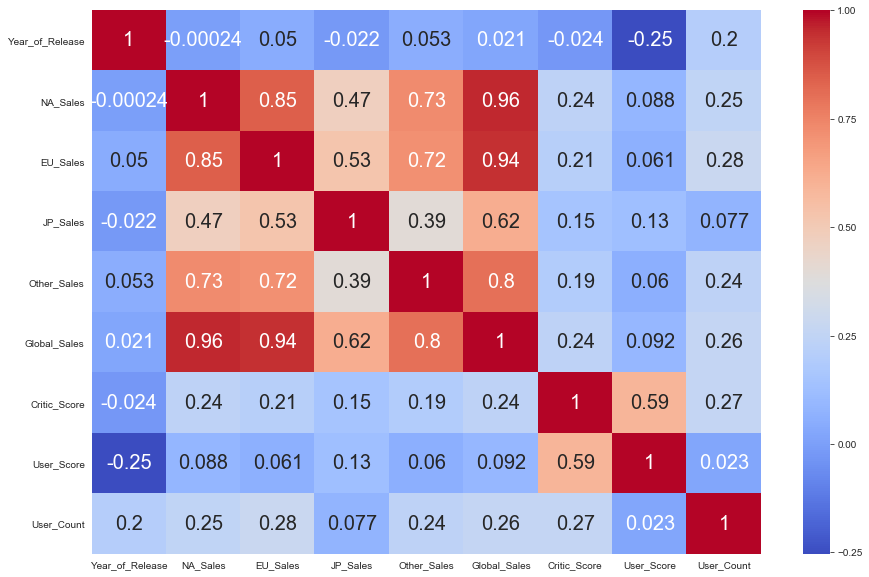

In [70]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='coolwarm')


### OLM for Global_Sales~NA_Sales

In [71]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~NA_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 7.175e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:07   Log-Likelihood:                -97623.
No. Observations:                6644   AIC:                         1.952e+05
Df Residuals:                    6642   BIC:                         1.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8535.3923   7720.928      1.105      0.269   -6600.107    2.37e+04
NA_Sales       1.9459      0.007    267.870      0.000       1.932       1.960
==============================================================================
Omnibus:                     6540.893   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1229684.939
Skew:                           4.319   Prob(JB):                         0.00
Kurtosis:                      69.086   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for Global_Sales~EU_Sales

In [72]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 5.167e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:11   Log-Likelihood:                -98606.
No. Observations:                6644   AIC:                         1.972e+05
Df Residuals:                    6642   BIC:                         1.972e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.46e+05   8758.898     16.669      0.000    1.29e+05    1.63e+05
EU_Sales       2.7110      0.012    227.302      0.000       2.688       2.734
==============================================================================
Omnibus:                     7298.418   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6851978.048
Skew:                           4.702   Prob(JB):                         0.00
Kurtosis:                     160.044   Cond. No.                     7.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for NA_Sales~EU_Sales

In [73]:
abs(corr).sort_values(by = 'NA_Sales',  ascending= False)['NA_Sales']
data_reg_simple = ols(formula= "NA_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 1.703e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:14   Log-Likelihood:                -96884.
No. Observations:                6644   AIC:                         1.938e+05
Df Residuals:                    6642   BIC:                         1.938e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.166e+05   6758.872     17.247      0.000    1.03e+05     1.3e+05
EU_Sales       1.2010      0.009    130.490      0.000       1.183       1.219
==============================================================================
Omnibus:                     4073.255   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1189199.408
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      68.447   Cond. No.                     7.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for Critic_Score~User_Score

In [74]:
abs(corr).sort_values(by = 'Critic_Score',  ascending= False)['Critic_Score']
data_reg_simple = ols(formula= "Critic_Score~User_Score", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     3534.
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:17   Log-Likelihood:                -25521.
No. Observations:                6644   AIC:                         5.105e+04
Df Residuals:                    6642   BIC:                         5.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.8933      0.708     40.820      0.000      27.506      30.281
User_Score     0.5732      0.010     59.448      0.000       0.554       0.592
==============================================================================
Omnibus:                      119.955   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.560
Skew:                          -0.301   Prob(JB):                     2.70e-29
Kurtosis:                       3.335   Cond. No.                         376.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking the relationships between the different categories

Visualizing relationship with each column of my dataset

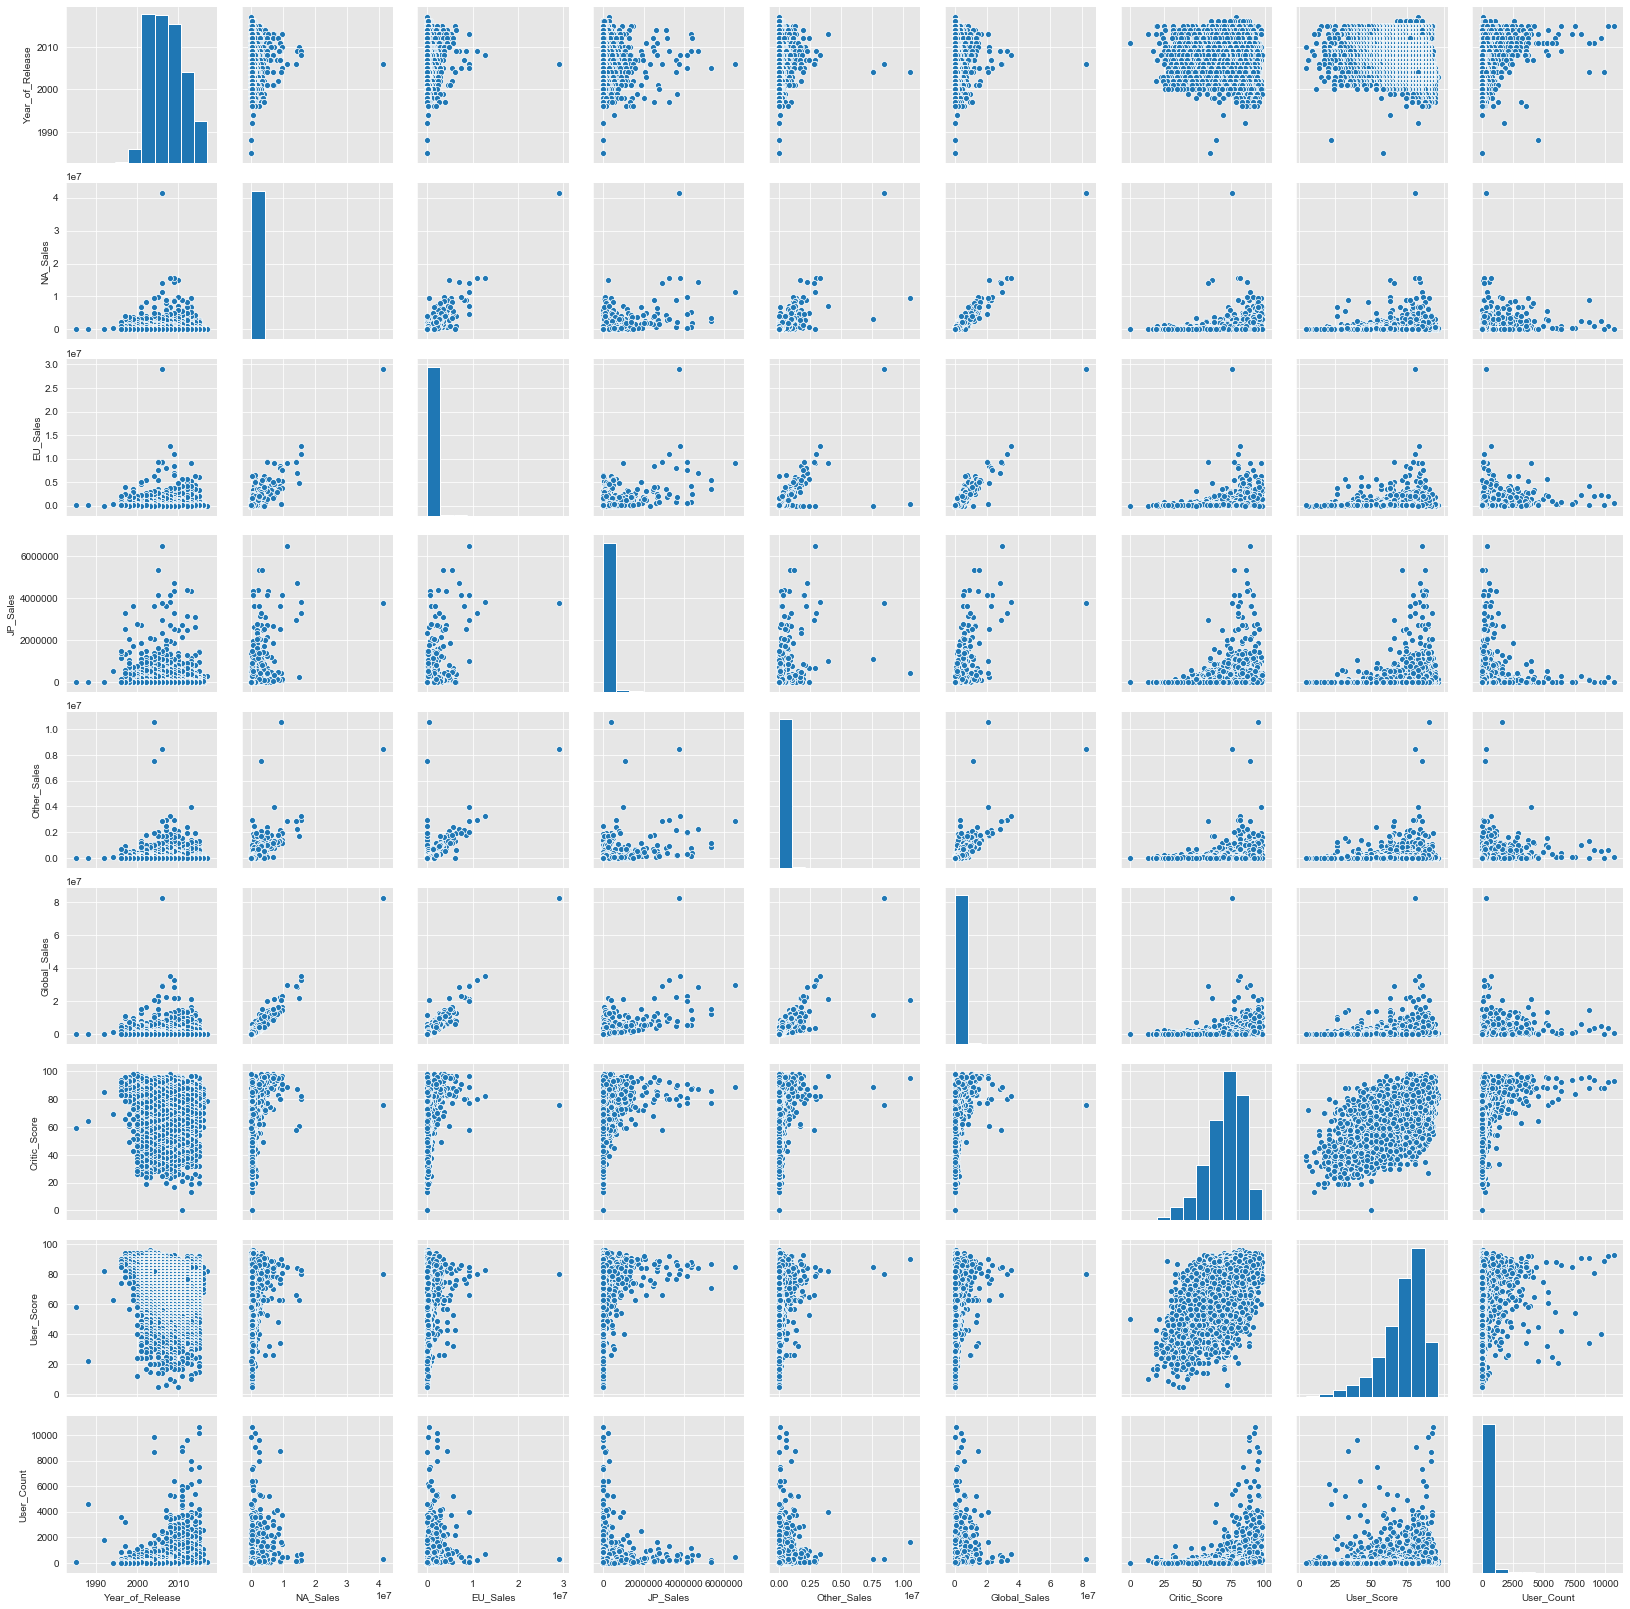

In [103]:
sns.pairplot(data_le, kind='scatter', dropna=True)

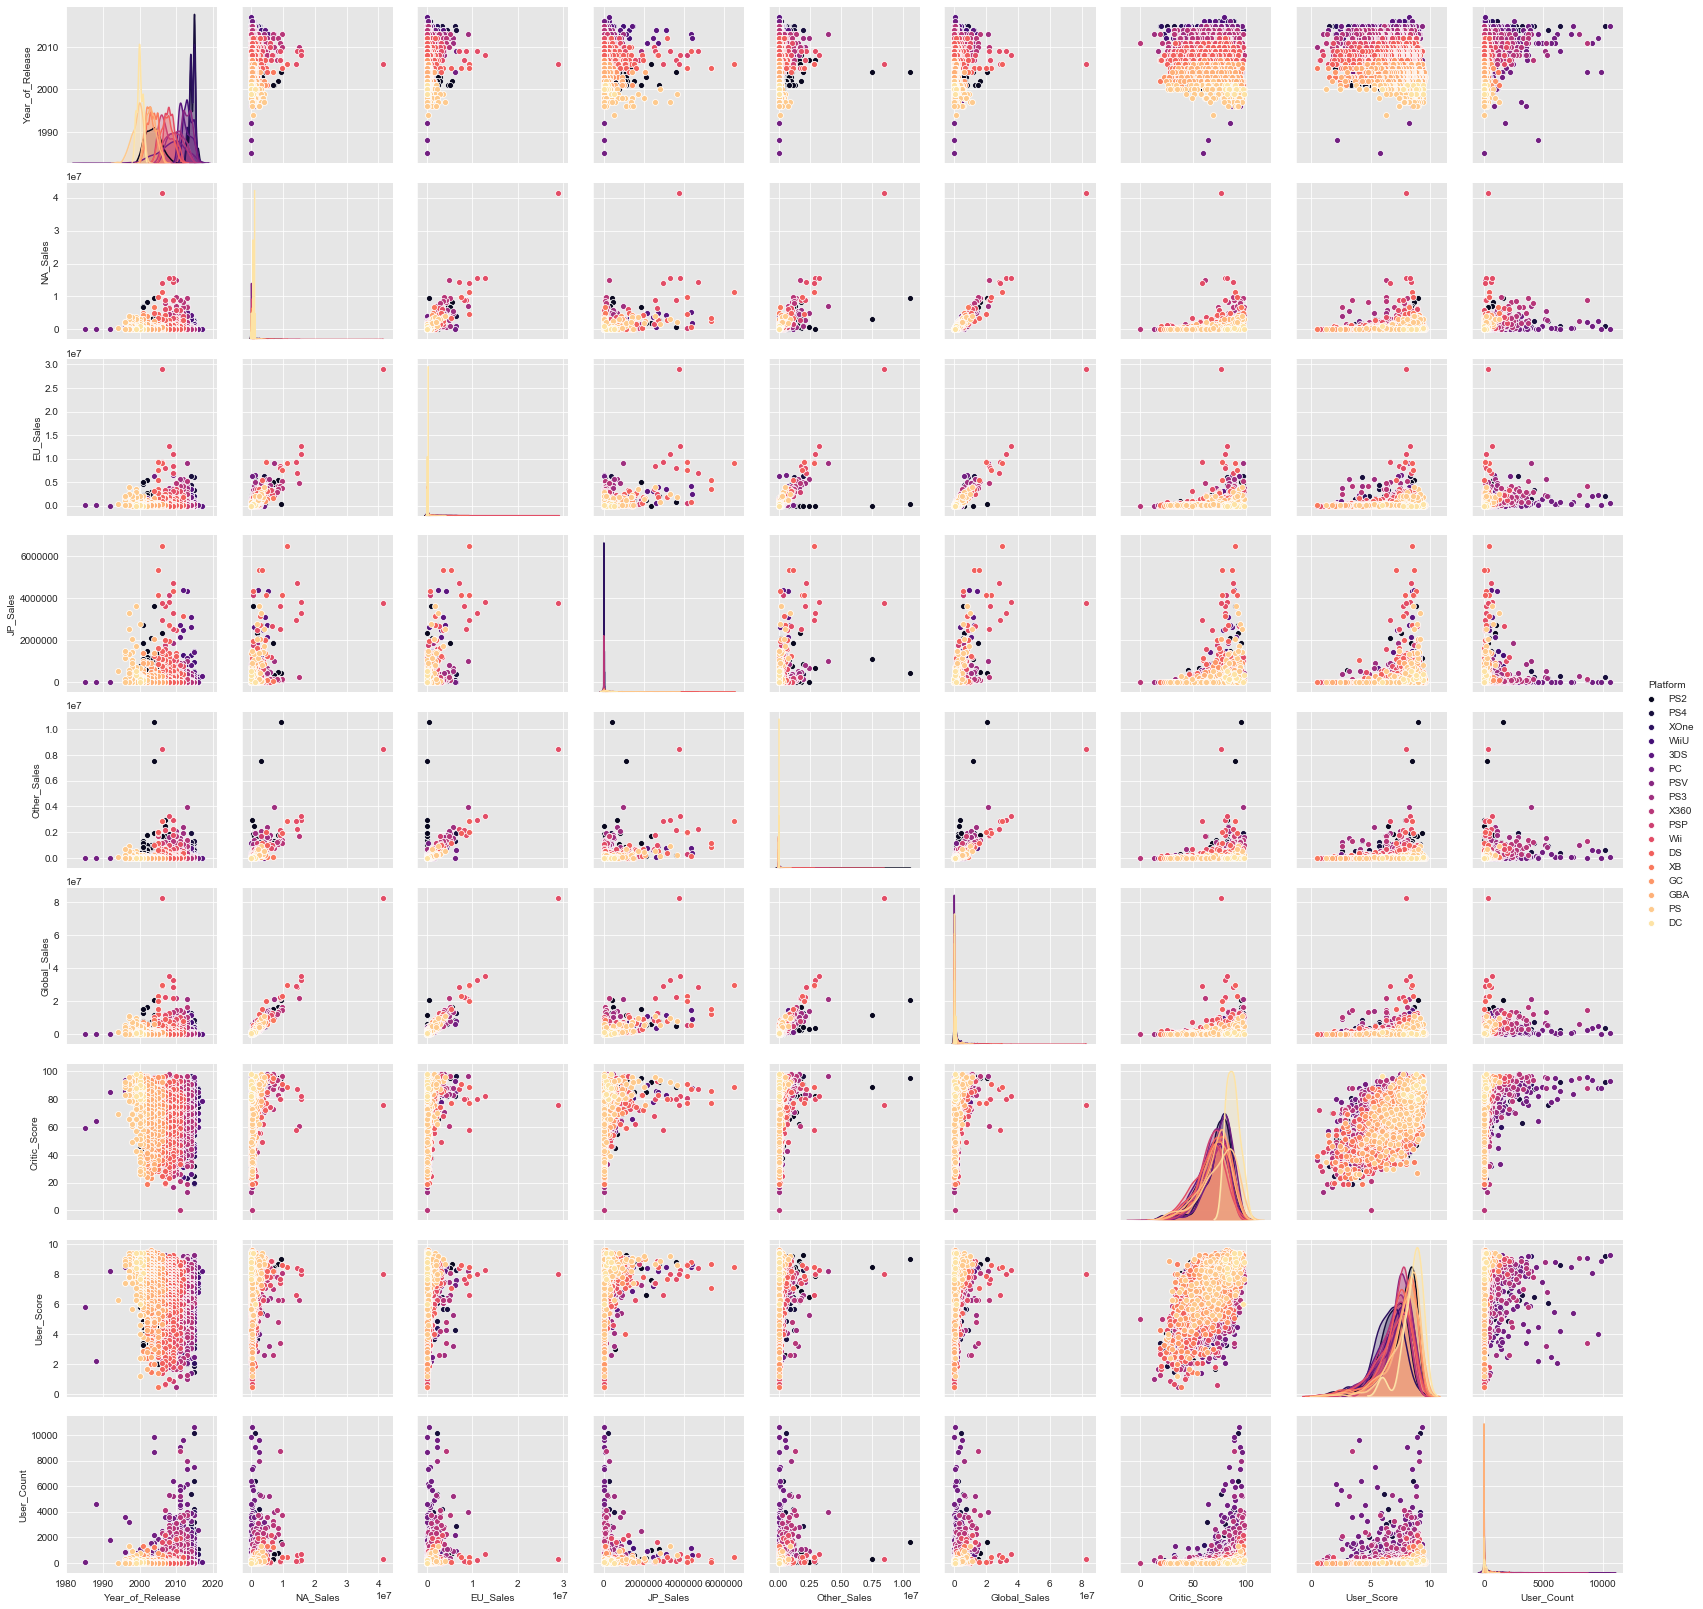

In [326]:
sns.pairplot(data_le, hue ='Platform', palette ='magma')

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



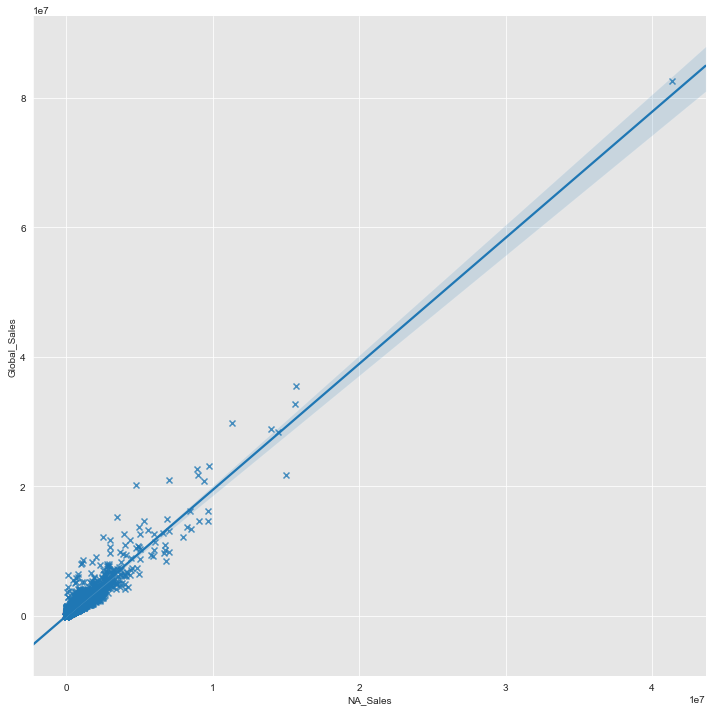

In [75]:

sns.lmplot(x='NA_Sales', y='Global_Sales', data= data_le, markers=[ "x"], fit_reg =True,size = 10)


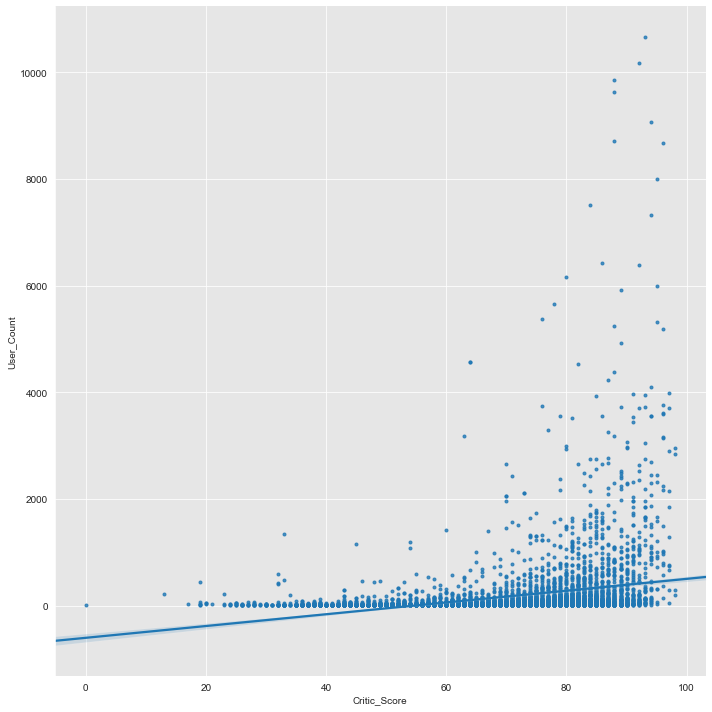

In [76]:
sns.lmplot(x='Critic_Score', y='User_Count', data= data_le, markers=["."], fit_reg =True,size = 10)

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



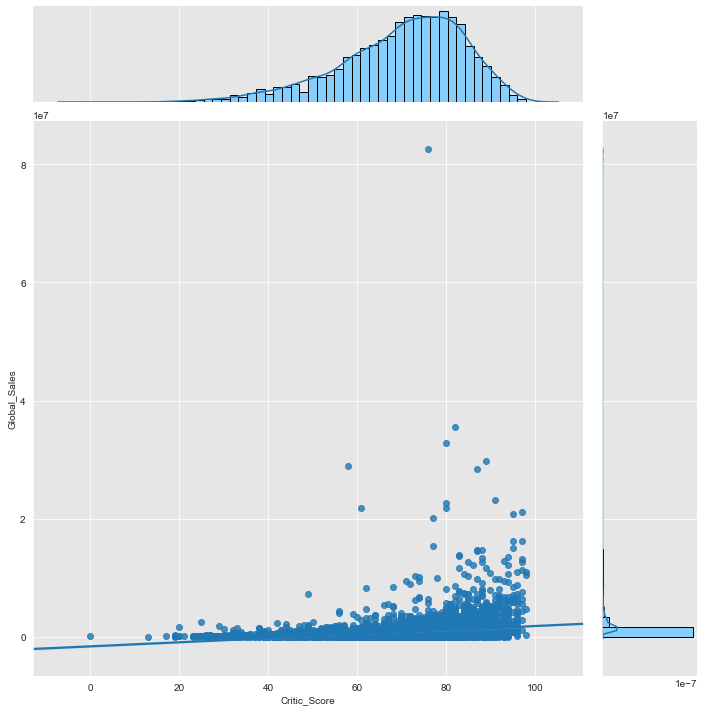

In [77]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

Box plot of the relationship for type against rank and score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

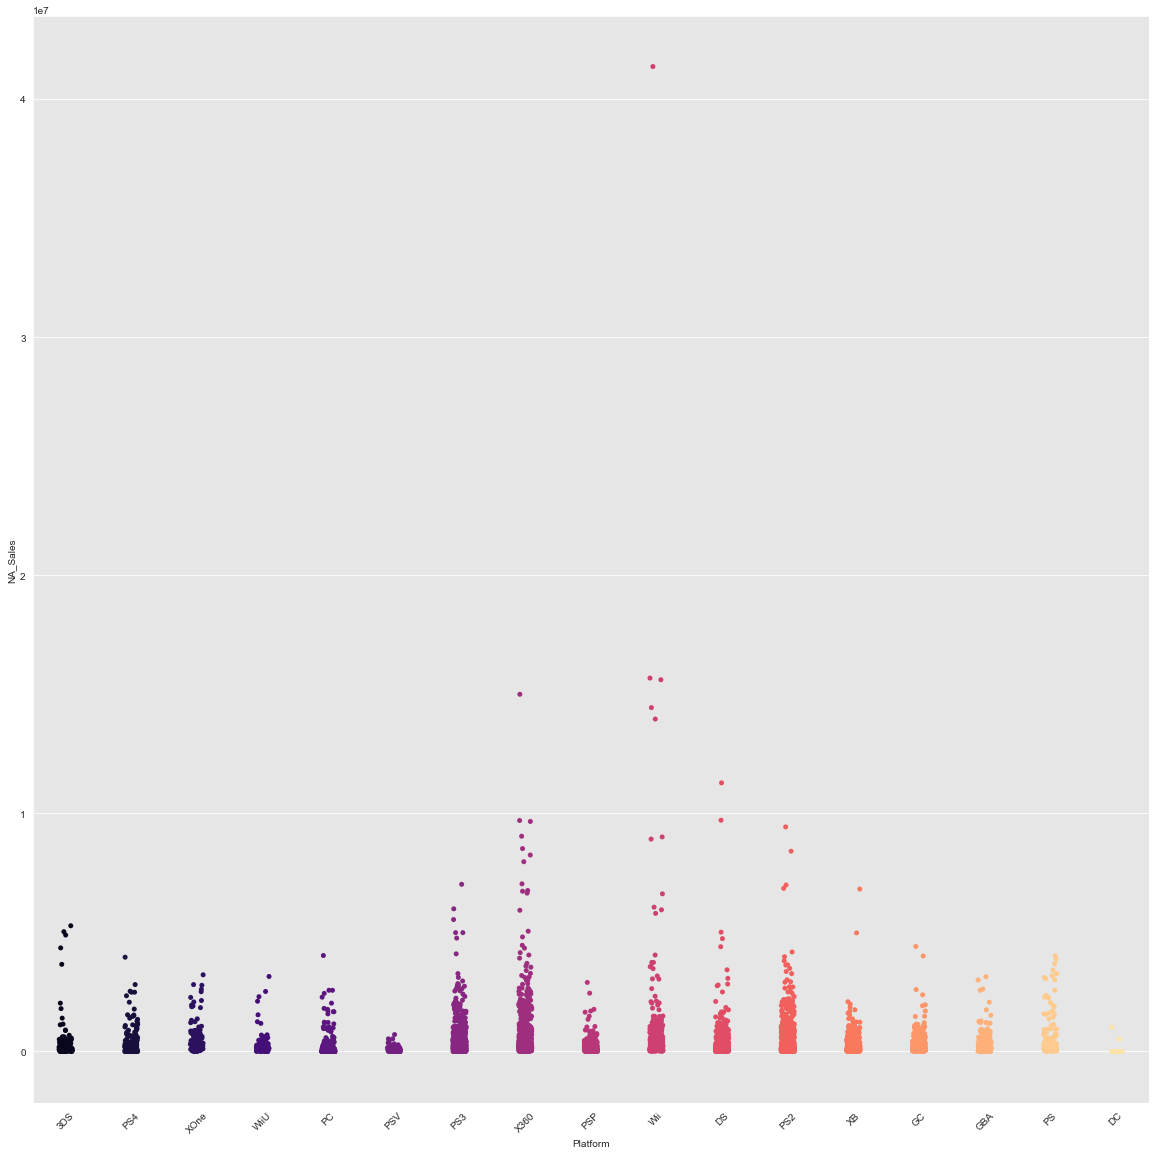

In [78]:
fig, ax = plt.subplots(figsize=(20,20))
sns.stripplot(data=data_le, x='Platform',y= 'NA_Sales' , orient='v', palette ='magma')
# plt.gca().invert_yaxis()
plt.ylim()
plt.xticks(rotation=45)

(-100, 16500000)

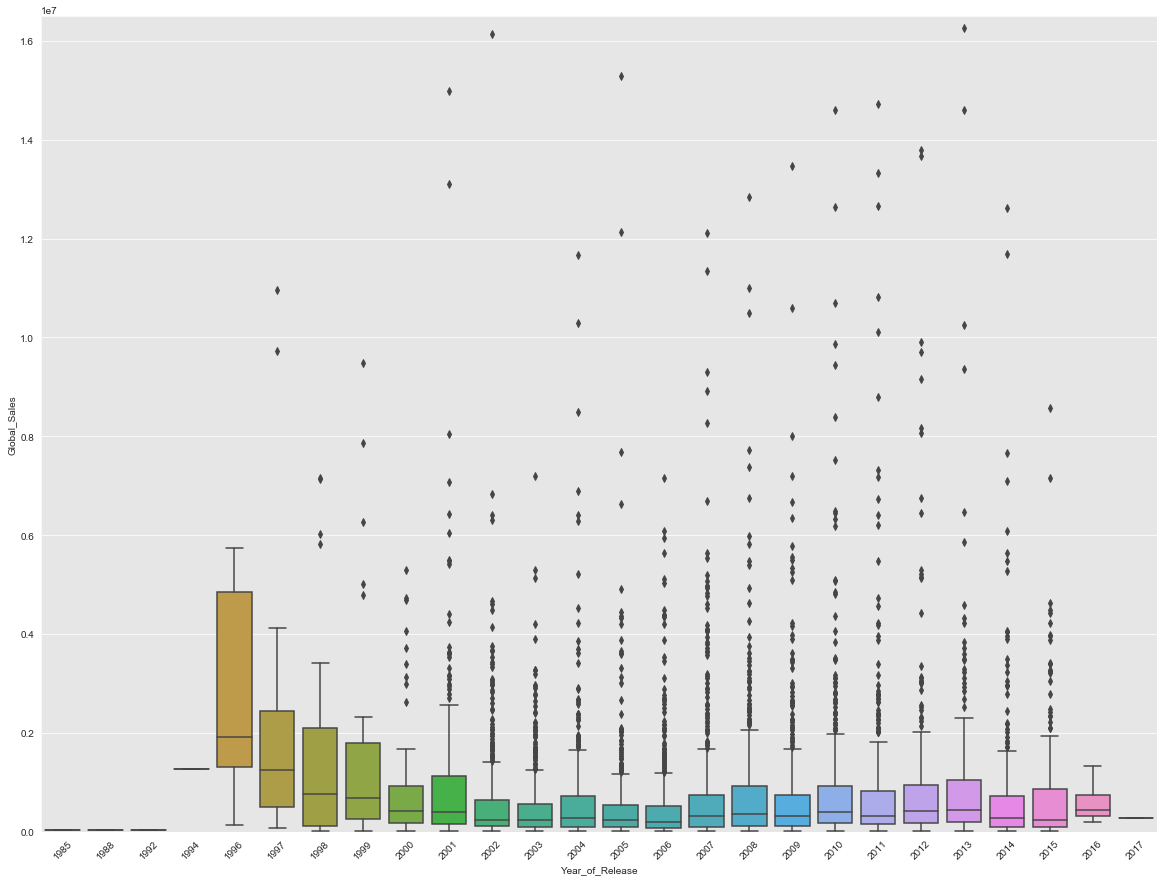

In [79]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=data_le, x='Year_of_Release' ,y= 'Global_Sales', orient='v', )
plt.xticks(rotation=45)
# had to limit y axis the graph was very small (one outlier on 2006 @ 8.2 million not shown)
plt.ylim(-100,16500000) 

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

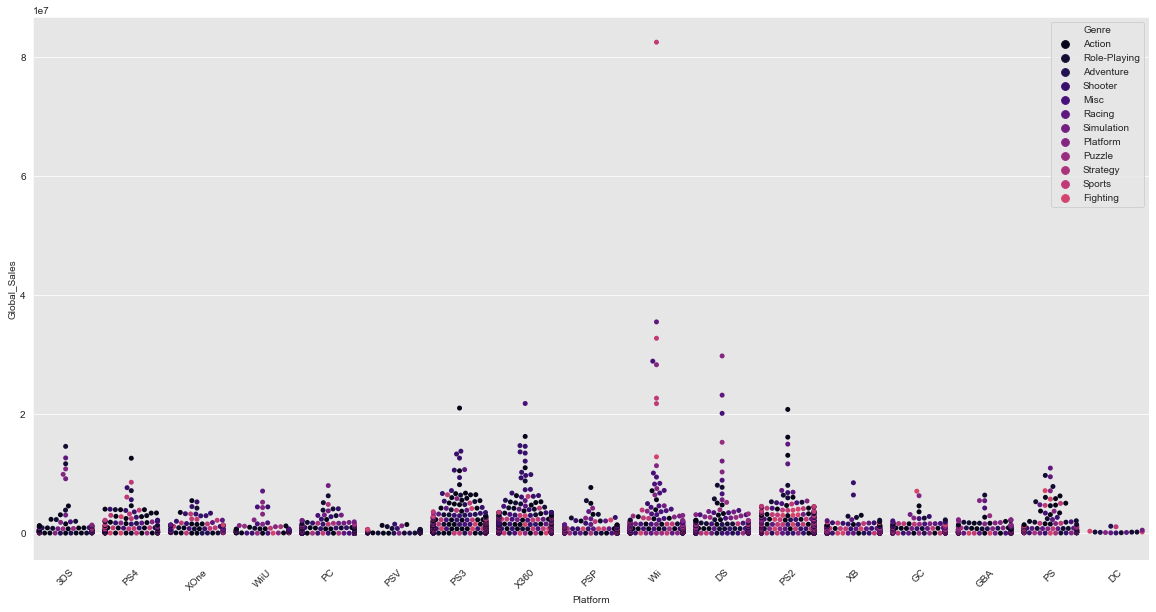

In [80]:
sns.set_palette("magma", 20)
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='Platform', y= 'Global_Sales', size=5, hue='Genre')
plt.xticks(rotation =45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 <a list of 82 Text xticklabel objects>)

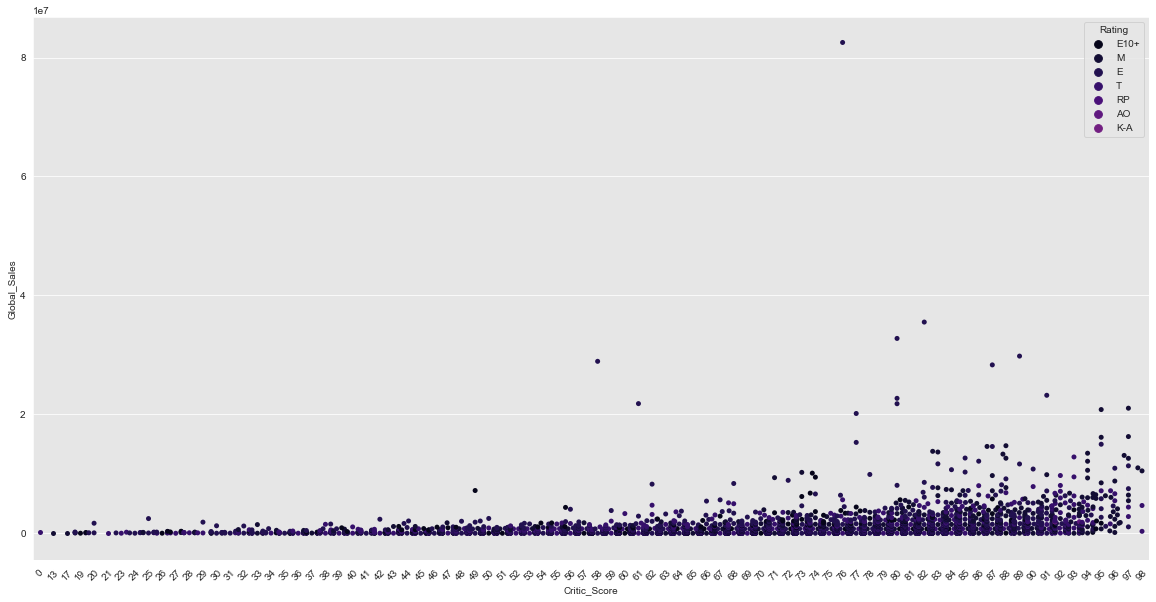

In [81]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='Critic_Score', y= 'Global_Sales', size=5, hue='Rating', )
plt.xticks(rotation =45)


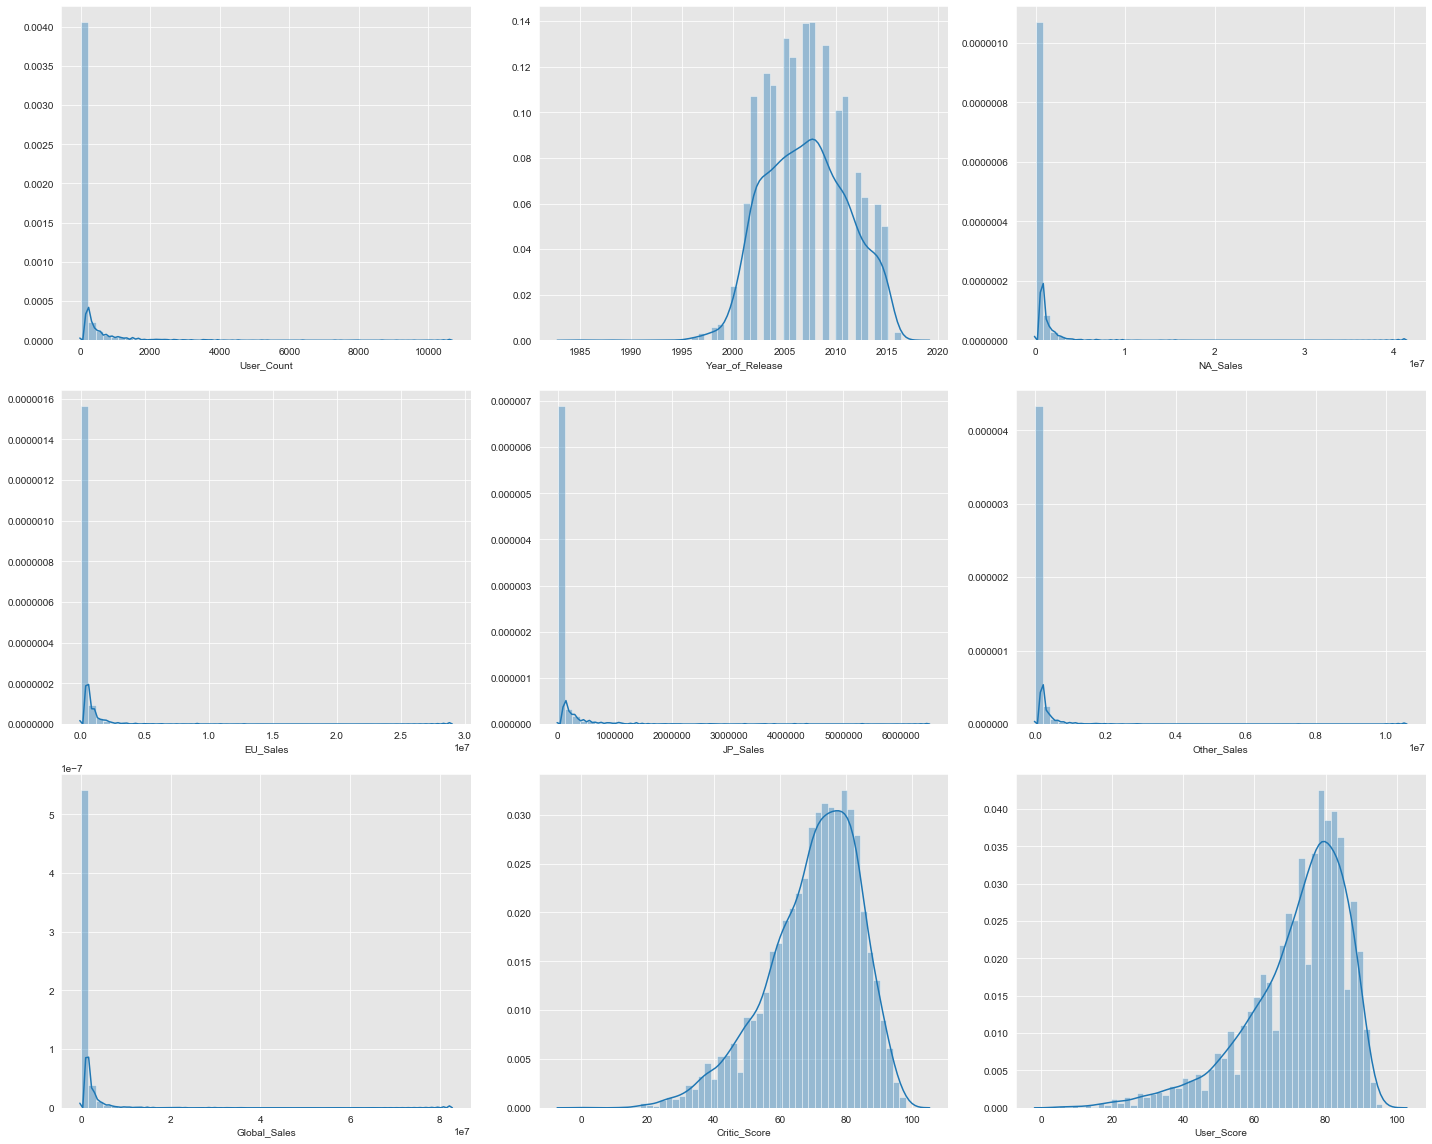

In [117]:
rows = 3
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_le_nums.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_le_nums[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

# Avg Sales against Consoles

In [85]:
NA_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend=dict(x=0.77, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor='light grey',
            xaxis=dict(title="Platform",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis=dict(title='Avg Sales',gridcolor="#DCDCDC"),
            title="Avg Sales from Different Markets")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)


# Avg Sales against Genres

In [86]:
NA_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend = dict(x=0.8, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor ='light grey',
            xaxis = dict(title="Genre",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis = dict(title='Avg Sales',gridcolor="#DCDCDC"),
            title ="Avg Sales from Different Markets")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)




# Global Sales vs North American Sales

In [134]:
#selecting the columns in the data and labeling them 
year = data_le_dummy.iloc[:,1]
na_sales=data_le_dummy.iloc[:,2]
eu_sales=data_le_dummy.iloc[:,3]
global_sales=data_le_dummy.iloc[:,6]
critic_score=data_le_dummy.iloc[:,7]
user_score=data_le_dummy.iloc[:,8]
user_count=data_le_dummy.iloc[:,9]
rating=data_le_dummy.iloc[:,10:16]
platform=data_le_dummy.iloc[:,16:31]
genre=data_le_dummy.iloc[:,31:31]


#Assigning X and y values aswell as the train and test of X and y

X1 = global_sales.values.reshape(-1,1)
y1 = critic_score.values.reshape(-1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=3)

print(f'{X1.shape},\n {y1.shape} ')

(6644, 1),
 (6644,) 


Preformed a Cross Validation on Linear Regression because it was the most accurate

In [121]:
# Linear Regression
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred_lr = lr.predict(X1_test)
#testing the accuracy of the train and test 
lr_accuracy_train = lr.score(X1_train,y1_train)
lr_accuracy_test = lr.score(X1_test,y1_test)


print(f'Linear Regression train accuracy is: {lr_accuracy_train}\nLinear Regression test accuracy is: {lr_accuracy_test}')

# Cross Validation - Linear Regression

lr_cross_val_score = cross_val_score(lr, X1,y1, cv=10)
lr_cv_score_avg = lr_cross_val_score.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg}')
cv_pred_lr = cross_val_predict(lr, X1_test, y1_test, cv=10)



Linear Regression train accuracy is: 0.8822208784173894
Linear Regression test accuracy is: 0.9472904910306119
Avg Cross Val Linear Regression is: 0.8848701669665194


In [123]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X1_train,y1_train)
y1_pred_rr = rr.predict(X1_test)

rr_accuracy_train = rr.score(X1_train,y1_train)
rr_accuracy_test = rr.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 0.01 train accuracy is: {rr_accuracy_train}\nRidge Regression @ alpha = 0.01 test accuracy is: {rr_accuracy_test}')

rr100 = Ridge(alpha=100)
rr100.fit(X1_train,y1_train)
y1_pred_rr100 = rr100.predict(X1_test)

rr100_accuracy_train = rr100.score(X1_train,y1_train)
rr100_accuracy_test = rr100.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 100 train accuracy is:  {rr100_accuracy_train}\nRidge Regression @ alpha = 100 test accuracy is:  {rr100_accuracy_test}')


# Cross Validation - Linear Regression

rr_cross_val_score = cross_val_score(rr, X1,y1, cv=10)
rr_cv_score_avg = rr_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 0.01 is: {rr_cv_score_avg}')
cv_pred_rr = cross_val_predict(rr, X1_test, y1_test, cv=10)


# Cross Validation - Linear Regression

rr100_cross_val_score = cross_val_score(rr100, X1,y1, cv=10)
rr100_cv_score_avg = rr100_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 100 is:  {rr100_cv_score_avg}')
cv_pred_rr100 = cross_val_predict(rr100, X1_test, y1_test, cv=10)


Ridge Regression @ alpha = 0.01 train accuracy is: 0.8822208784173894
Ridge Regression @ alpha = 0.01 test accuracy is: 0.9472904910306119
Ridge Regression @ alpha = 100 train accuracy is:  0.8822208784173894
Ridge Regression @ alpha = 100 test accuracy is:  0.9472904910306107
Avg Cross Val Ridge Regression alpha @ 0.01 is: 0.8848701669665194
Avg Cross Val Ridge Regression alpha @ 100 is:  0.8848701669665203


In [124]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01,max_iter=5560)
lasso01.fit(X1_train,y1_train)
y1_pred_lasso01 = lasso01.predict(X1_test)

lasso01_accuracy_train = lasso01.score(X1_train,y1_train)

lasso01_accuracy_test = lasso01.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train}\nLasso Regression @ alpha 0.01 test accuracy is:  {lasso01_accuracy_test}')

lasso05 = Lasso(alpha=0.05,max_iter=5560)
lasso05.fit(X1_train,y1_train)
y1_pred_lasso05 = lasso05.predict(X1_test)

lasso05_accuracy_train = lasso05.score(X1_train,y1_train)

lasso05_accuracy_test = lasso05.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.05 train accuracy is: {lasso05_accuracy_train}\nLasso Regression @ alpha 0.05 test accuracy is:  {lasso05_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)

lasso05_cross_val_score = cross_val_score(lasso05, X1,y1, cv=10)
lasso05_cv_score_avg = lasso05_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.05 is: {lasso05_cv_score_avg}')
cv_pred_lasso05 = cross_val_predict(lasso05, X1_test, y1_test, cv=10)

Lasso Regression @ alpha 0.01 train accuracy is: 0.8822208784173894
Lasso Regression @ alpha 0.01 test accuracy is:  0.9472904910306116
Lasso Regression @ alpha 0.05 train accuracy is: 0.8822208784173894
Lasso Regression @ alpha 0.05 test accuracy is:  0.9472904910306105
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.8848701669665197
Avg Cross Val Lasso Regression alpha @ 0.05 is: 0.8848701669665207


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4811956098483.125, tolerance: 1305822530367.8933

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3097964072389.3125, tolerance: 1295430930128.2048

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2561014993085.0, tolerance: 1247254228724.2341

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502896537305.5, tolerance: 12774074863

In [140]:
#LogisticRegression
logreg= LogisticRegression(C=1,fit_intercept=True)
logreg.fit(X1_train,y1_train)
y1_pred_logreg = logreg.predict(X1_test)

logreg_accuracy_train = logreg.score(X1_train,y1_train)

logreg_accuracy_test = logreg.score(X1_test,y1_test)
                                              
                                    
print(f'Logistic Regression train accuracy is {logreg_accuracy_train} and Logistic Regression test accuracy is {logreg_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Logistic Regression train accuracy is 0.02666666666666667 and Logistic Regression test accuracy is 0.02106318956870612
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.013487143689081304


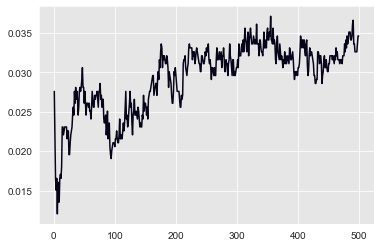

In [221]:

k_range= range(1,500)
scores= []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train, y1_train)
    y1_pred_knn = knn.predict(X1_test)
    scores.append(metrics.accuracy_score(y1_test,y1_pred_knn))
plt.plot(k_range,scores)


In [230]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1_test, y1_test)
y1_pred_knn = knn.predict(X1_test)


# K_nearest Neighbor = 175 
knn175 = neighbors.KNeighborsClassifier(n_neighbors=175)
knn175.fit(X1_test, y1_test)
y1_pred_knn175 = knn175.predict(X1_test)



knn_accuracy_train = knn.score(X1_train,y1_train)
knn_accuracy_test = knn.score(X1_test,y1_test)

knn175_accuracy_train = knn175.score(X1_train,y1_train)
knn175_accuracy_test = knn175.score(X1_test,y1_test)


print(f'K_nearest Neighbor = 1 Regression train accuracy is {knn_accuracy_train}\nK_nearest Neighbor = 1 Regression test accuracy is {knn_accuracy_test}\n')
print(f'K_nearest Neighbor = 175 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 175 Regression test accuracy is {knn5_accuracy_test}')


K_nearest Neighbor = 1 Regression train accuracy is 0.02666666666666667
K_nearest Neighbor = 1 Regression test accuracy is 0.18856569709127383

K_nearest Neighbor = 175 Regression train accuracy is 0.027741935483870966
K_nearest Neighbor = 175 Regression test accuracy is 0.06168505516549649


In [154]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1_train,y1_train)
rf.score(X1_test,y1_test)
y1_pred_rf_1 = rf.predict(X1_test)

rf_accuracy_train_1 = rf.score(X1_train,y1_train)
rf_accuracy_test_1 = rf.score(X1_test,y1_test)

predict_acc = metrics.accuracy_score(y1_test,y1_pred_rf_1)
print(f'Random Forest Classifier train accuracy is {rf_accuracy_train_1}\nRandom Forest Classifier test accuracy is {rf_accuracy_test_1}\n'
        f'Random Forest Classifier predict accuracy is {predict_acc}')


Random Forest Classifier train accuracy is 0.15741935483870967
Random Forest Classifier test accuracy is 0.019558676028084254
Random Forest Classifier predict accuracy is 0.019558676028084254


Not needed but this is used to find the optimal k nearest neighbor from the range specified


# Ploting the Predicted Values for each model

Original Dataset


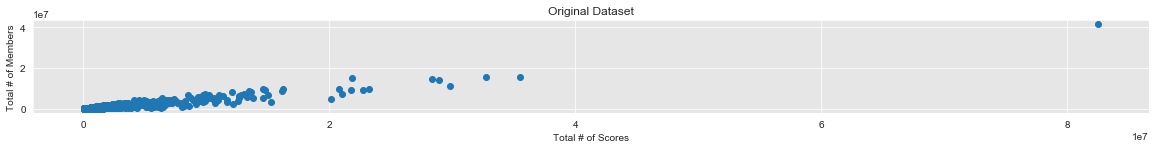

Predicted Model for Linear Regression


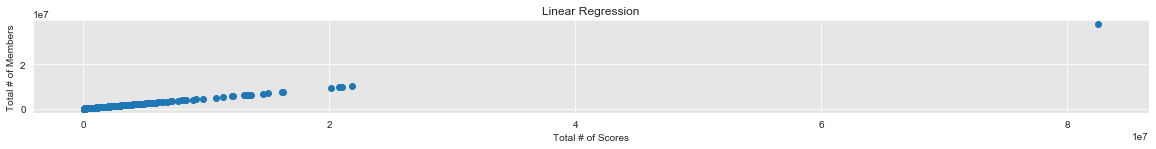

Predicted Cross Validation Model for Linear Regression


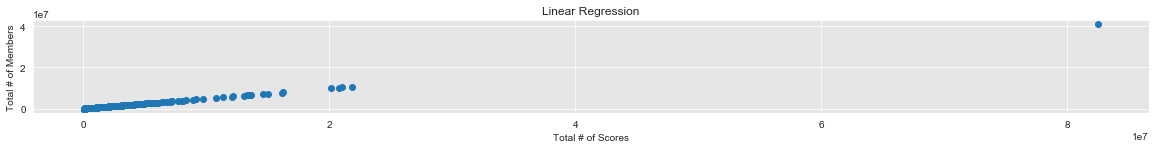

Predicted Model for Logistic Regression


NameError: name 'y1_pred_logreg' is not defined

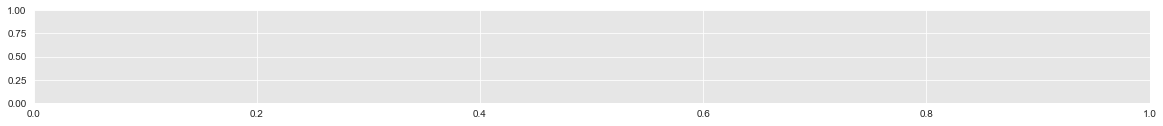

In [348]:
# ploting Linear Regression model
print('Original Dataset')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(811)
plt.scatter(X1,y1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Original Dataset')
plt.show()


# ploting Linear Regression model
print('Predicted Model for Linear Regression')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(812)
plt.scatter(X1_test,y1_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Linear Regression model
print('Predicted Cross Validation Model for Linear Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(813)
plt.scatter(X1_test, cv_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Logistic Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(814)
plt.scatter(X1_test,y1_pred_logreg)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Logistic Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Ridge Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(815)
plt.scatter(X1_test,y1_pred_rr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Ridge Regression')
plt.show()


# ploting Lasso Regression model
print('Predicted Model for Lasso Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(816)
plt.scatter(X1_test,y1_pred_lasso01)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Lasso Regression')
plt.show()


# ploting Knn model Neighbor=1
print('Predicted Model for K-nearest Neighbors Regression @ 1')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(817)
plt.scatter(X1_test,y1_pred_knn)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Knn')
plt.show()


# ploting Random Forest Classifier =1 Model
print('Predicted Model for Random Forest Classifier @ N Estimators 100')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(818)
plt.scatter(X1_test,y1_pred_rf_1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Random Forest Classifier')
plt.show()


# Platform against Global Sales

In [71]:
#Assigning X and y values aswell as the train and test of X and y
X2 = global_sales.values.reshape(-1,1)
y2 = platform.values.reshape(-1)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=3)


In [72]:
#Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X2_train,y2_train)

y2_pred_lr = lr.predict(X2_test)

lr_accuracy_train2 = lr.score(X2_train,y2_train)

lr_accuracy_test2 = lr.score(X2_test,y2_test)
 
    
print(f'Linear Regression train accuracy is: {lr_accuracy_train2}\nLinear Regression test accuracy is: {lr_accuracy_test2}')


# Cross Validation - Linear Regression
lr_cross_val_score2 = cross_val_score(lr, X2,y2, cv=10)
lr_cv_score_avg2 = lr_cross_val_score2.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg2}')
cv_pred_lr2 = cross_val_predict(lr, X2_test, y2_test, cv=10)


ValueError: could not convert string to float: 'PSP'

In [44]:
X2_test.shape

(1112, 1)

In [45]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X2_train,y2_train)
y2_pred_rr = rr.predict(X2_test)

rr_accuracy_train2 = rr.score(X2_train,y2_train)

rr_accuracy_test2 = rr.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr_accuracy_train2}\nRidge Regression test accuracy is: {rr_accuracy_test2}')

rr100 = Ridge(alpha=100)
rr100.fit(X2_train,y2_train)
y2_pred_rr100 = rr100.predict(X2_test)

rr100_accuracy_train2 = rr100.score(X2_train,y2_train)

rr100_accuracy_test2 = rr100.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr100_accuracy_train2}\nRidge Regression test accuracy is: {rr100_accuracy_test2}')



Ridge Regression train accuracy is: 0.7158371469432536
Ridge Regression test accuracy is: 0.6960977586810573
Ridge Regression train accuracy is: 0.7158371469432536
Ridge Regression test accuracy is: 0.6960977586959989


In [46]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01)
lasso01.fit(X2_train,y2_train)
y2_pred_lasso01 = lasso01.predict(X2_test)

lasso01_accuracy_train_2 = lasso01.score(X2_train,y2_train)

lasso01_accuracy_test_2 = lasso01.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train_2}\nLasso Regression @ alpha 0.01 test accuracy is: {lasso01_accuracy_test_2}')

lasso00001 = Lasso(alpha=0.00001)
lasso00001.fit(X2_train,y2_train)
y2_pred_lasso00001 = lasso00001.predict(X2_test)

lasso00001_accuracy_train_2 = lasso00001.score(X2_train,y2_train)

lasso00001_accuracy_test_2 = lasso00001.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.00001 train accuracy is: {lasso00001_accuracy_train_2}\nLasso Regression @ alpha 0.00001 test accuracy is: {lasso00001_accuracy_test_2}')


Lasso Regression @ alpha 0.01 train accuracy is: 0.7158371469364215
Lasso Regression @ alpha 0.01 test accuracy is: 0.6960977919435276
Lasso Regression @ alpha 0.00001 train accuracy is: 0.7158371469432537
Lasso Regression @ alpha 0.00001 test accuracy is: 0.696097758714325
